In [4]:
import os
import os.path as path
import numpy as np
import pandas as pd 
# import matplotlib.pyplot as plt 
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.models import load_model

In [2]:
current_dir = os.path.join(os.getcwd())
file = os.path.join(path.dirname(path.dirname(current_dir)), "generate_data\data_cwa.csv")
myData = pd.read_csv(file, delimiter=',', usecols=['cwa','credit','time','difficulty', 'score'])
my_data_copy = myData
myData.shape

(180346, 5)

In [3]:
myData["score"] = myData["score"].values / 100
myData["cwa"] = myData["cwa"].values / 100
myData["credit"] = myData["credit"].values / 10
myData ["difficulty"] = myData['difficulty'].values / 5
myData["time"] = myData["time"].values / 6

In [4]:
df = pd.DataFrame(myData)
df = df.sample(frac=1)

myData = df


In [5]:
myData

,cwa,credit,time,difficulty,score
119974,0.5862,0.1,0.208333,0.8,0.49
177651,0.3889,0.4,0.166667,1.0,0.49
57922,0.6525,0.1,0.250000,1.0,0.57
130276,0.5571,0.2,0.125000,0.2,0.47
49831,0.6517,0.4,0.208333,0.2,0.57
...,...,...,...,...,...
117316,0.5626,0.2,0.125000,0.2,0.42
102238,0.6109,0.3,0.166667,0.8,0.54
118929,0.5504,0.3,0.166667,0.6,0.58
77623,0.6149,0.4,0.250000,0.8,0.56


In [6]:
targets = myData[['score']].values
myData.drop(('score'), axis=1, inplace=True)
data = myData.values

print(targets.shape)
print(data.shape)

(180346, 1)
(180346, 4)


In [7]:
num_train = int(0.5 * len(data)) 
num_val = int(0.25 * len(data))
num_test = int(0.25 * len(data))

In [8]:
train_data = data[0 : num_train]
test_data = data[num_train: num_train + num_test]
val_data = data[num_train + num_test:]

train_targets = targets[0 : num_train]
test_targets = targets[num_train: num_train + num_test]
val_targets = targets[num_train + num_test:]

print(len(train_data) + len(test_data) + len(val_data))
print(len(train_targets) + len(test_targets) + len(val_targets))

180346
180346


In [9]:
model = models.Sequential()
model.add(layers.Dense(1, activation="relu",input_shape=(train_data.shape[1],)))
# model.add(layers.Dense(1, activation="relu"))
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(1, activation="relu", kernel_regularizer=regularizers.l2(0.01)))
# model.add(layers.Dropout(0.5))
model.add(layers.Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 5         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(
    optimizer=optimizers.RMSprop(learning_rate=2e-4),
    loss="mse",
    metrics=['mae']
    )

In [11]:
history = model.fit(train_data,
                    train_targets,
                    epochs=40,
                    batch_size=512,
                    validation_data=(val_data, val_targets)
                    )

Epoch 1/40
177/177 [==============================] - 1s 2ms/step - loss: 0.1839 - mae: 0.3634 - val_loss: 0.1528 - val_mae: 0.3250
Epoch 2/40
177/177 [==============================] - 0s 1ms/step - loss: 0.1350 - mae: 0.3026 - val_loss: 0.1214 - val_mae: 0.2849
Epoch 3/40
177/177 [==============================] - 0s 1ms/step - loss: 0.1123 - mae: 0.2727 - val_loss: 0.1044 - val_mae: 0.2621
Epoch 4/40
177/177 [==============================] - 0s 1ms/step - loss: 0.0978 - mae: 0.2529 - val_loss: 0.0919 - val_mae: 0.2451
Epoch 5/40
177/177 [==============================] - 0s 1ms/step - loss: 0.0860 - mae: 0.2367 - val_loss: 0.0808 - val_mae: 0.2295
Epoch 6/40
177/177 [==============================] - 0s 1ms/step - loss: 0.0755 - mae: 0.2213 - val_loss: 0.0707 - val_mae: 0.2144
Epoch 7/40
177/177 [==============================] - 0s 1ms/step - loss: 0.0659 - mae: 0.2065 - val_loss: 0.0616 - val_mae: 0.2000
Epoch 8/40
177/177 [==============================] - 0s 1ms/step - loss: 0.

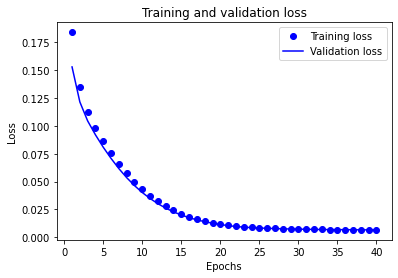

In [12]:
acc = history.history['mae']
val_acc = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [1]:
model.save('score_prediction_2.h5')

NameError: name 'model' is not defined

In [14]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

1409/1409 [==============================] - 1s 776us/step - loss: 0.0067 - mae: 0.0660


In [7]:
model = load_model('score_prediction_1.h5')

In [8]:
predicted = model.predict([[0.8081, 0.1, 0.458333, 0.2]])
predicted   

array([[0.8345965]], dtype=float32)